# Importing libs

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%notebook inline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Reading file and checking head

In [3]:
df = pd.read_csv("AirQualityUCI.csv", sep=";")

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [5]:
df.shape

(9471, 17)

In [6]:
df.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

#  Data Preprocessing

In [7]:
df.drop(df.iloc[:, -2:], axis=1, inplace=True)

In [8]:
df.drop("Time", axis=1, inplace=True)

In [9]:
df.head()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [10]:
df.shape

(9471, 14)

Dropping rows with NULL values

In [11]:
df.dropna(axis=0, inplace=True)
df.shape

(9357, 14)

In [12]:
df.isna().sum()

Date             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Modifying object type columns

In [13]:
df.dtypes

Date              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [14]:
for col in df.columns[1:]:
    if df[col].dtype =="object":
        df[col] = df[col].str.replace(",", ".")
        df[col] = df[col].astype("float64")
        

In [15]:
df.head()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Setting index to date

In [16]:
df['Date']=pd.to_datetime(df['Date'], format='%d/%m/%Y') 
df.set_index('Date',inplace=True)

In [17]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-03-10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Creating month column

In [18]:
df['Month']=df.index.month 

In [19]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
Date,,,,,,,,,,,,,,
2004-03-10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3
2004-03-10,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3
2004-03-10,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3
2004-03-10,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3
2004-03-10,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3


In [20]:
df.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Month              int64
dtype: object

Treating Outliers

In [21]:
sns.set_style("darkgrid")

In [22]:
cols = list(df.columns)
cols.remove("RH")
len(cols)

13

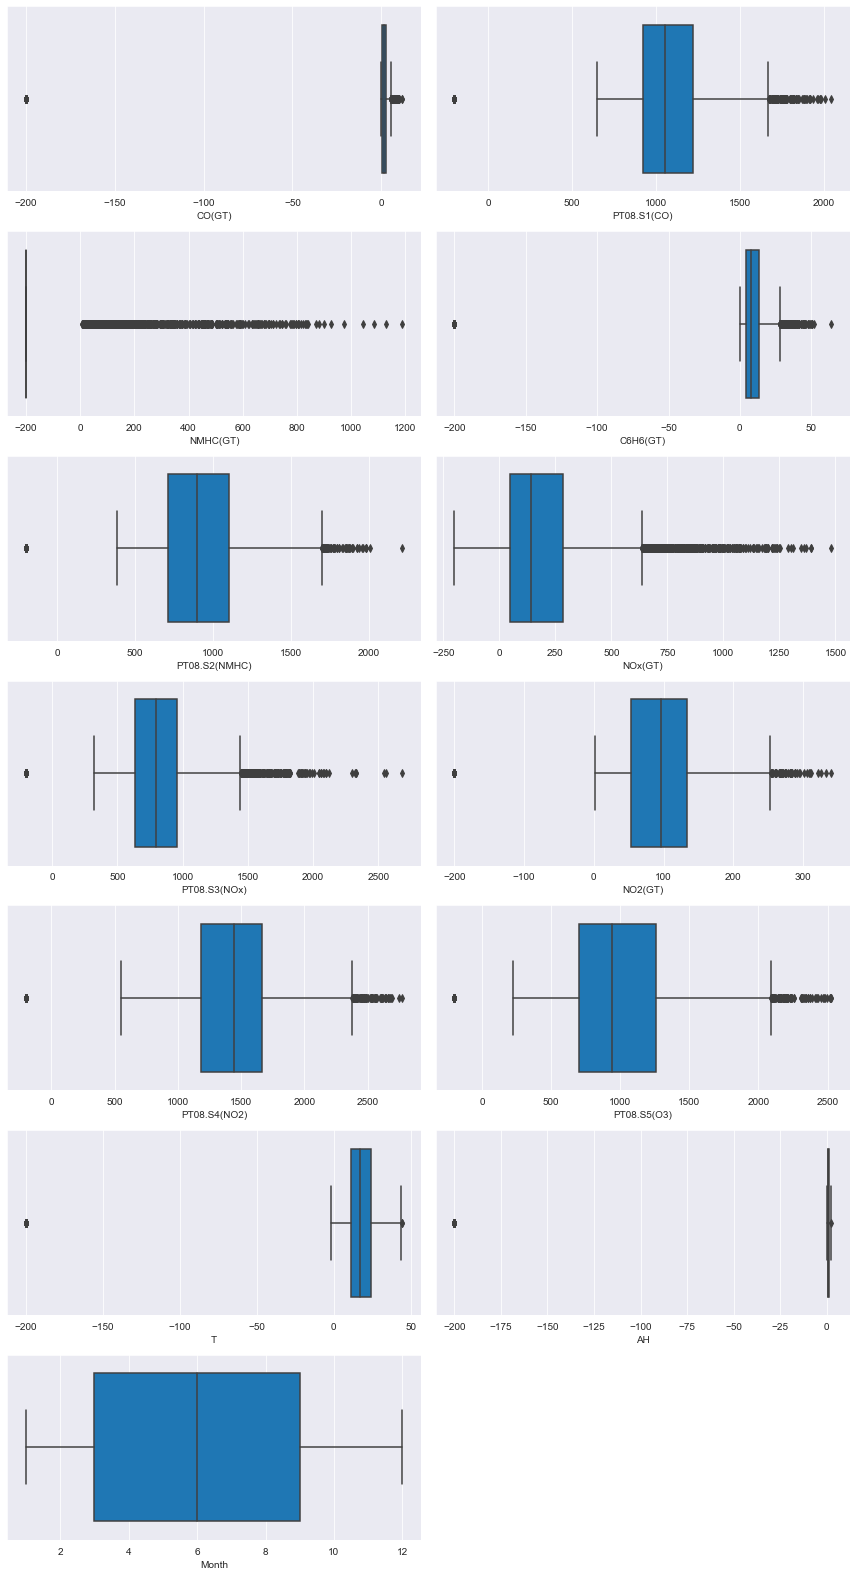

In [23]:
plt.figure(figsize=(12,22))

for i,col in enumerate(cols,1):
    plt.subplot(7,2, i)
    sns.boxplot(df[col], saturation=1)
    plt.tight_layout()

In [24]:
df1 = df.copy()
cols_to_remove = ["AH", "NMHC(GT)", "CO(GT)", "C6H6(GT)"]
cols = [col for col in cols if col not in cols_to_remove]

In [25]:
def removeOutliers(col, i, df1):
    
    df = df1.copy()
    
    df["zscore" + str(i)] = ((df[col]-df[col].mean()) / df[col].std())
    bool_series = np.abs(df["zscore" + str(i)])<3
    
    df = df[bool_series]
    display(df.head())
    display(df.shape)
    print("outliers removed:", df1.shape[0] - df.shape[0])
    print("="*20)
    
    return df
    

In [26]:
for i,col in enumerate(cols,1):
    print(col)
    df1 = removeOutliers(col, i, df1) 

PT08.S1(CO)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,zscore1
Date,,,,,,,,,,,,,,,
2004-03-10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,0.942932
2004-03-10,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,0.736767
2004-03-10,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,1.070270
2004-03-10,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,0.991442
2004-03-10,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,0.676130


(8990, 15)

outliers removed: 367
PT08.S2(NMHC)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,zscore1,zscore2
Date,,,,,,,,,,,,,,,,
2004-03-10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,0.942932,0.400953
2004-03-10,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,0.736767,0.059756
2004-03-10,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,1.070270,-0.000235
2004-03-10,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,0.991442,0.033510
2004-03-10,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,0.676130,-0.386426


(8954, 16)

outliers removed: 36
NOx(GT)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,zscore1,zscore2,zscore3
Date,,,,,,,,,,,,,,,,,
2004-03-10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,0.942932,0.400953,0.017844
2004-03-10,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,0.736767,0.059756,-0.236152
2004-03-10,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,1.070270,-0.000235,-0.123265
2004-03-10,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,0.991442,0.033510,0.042034
2004-03-10,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,0.676130,-0.386426,-0.123265


(8866, 17)

outliers removed: 88
PT08.S3(NOx)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,zscore1,zscore2,zscore3,zscore4
Date,,,,,,,,,,,,,,,,,,
2004-03-10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,0.942932,0.400953,0.017844,0.846833
2004-03-10,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,0.736767,0.059756,-0.236152,1.311429
2004-03-10,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,1.070270,-0.000235,-0.123265,1.177563
2004-03-10,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,0.991442,0.033510,0.042034,0.988574
2004-03-10,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,0.676130,-0.386426,-0.123265,1.433484


(8756, 18)

outliers removed: 110
NO2(GT)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,zscore1,zscore2,zscore3,zscore4,zscore5
Date,,,,,,,,,,,,,,,,,,,
2004-03-10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,0.942932,0.400953,0.017844,0.846833,0.454370
2004-03-10,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,0.736767,0.059756,-0.236152,1.311429,0.288437
2004-03-10,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,1.070270,-0.000235,-0.123265,1.177563,0.462271
2004-03-10,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,0.991442,0.033510,0.042034,0.988574,0.525484
2004-03-10,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,0.676130,-0.386426,-0.123265,1.433484,0.478075


(8756, 19)

outliers removed: 0
PT08.S4(NO2)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,zscore1,zscore2,zscore3,zscore4,zscore5,zscore6
Date,,,,,,,,,,,,,,,,,,,,
2004-03-10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,0.942932,0.400953,0.017844,0.846833,0.454370,0.702302
2004-03-10,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,0.736767,0.059756,-0.236152,1.311429,0.288437,0.308799
2004-03-10,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,1.070270,-0.000235,-0.123265,1.177563,0.462271,0.296964
2004-03-10,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,0.991442,0.033510,0.042034,0.988574,0.525484,0.382766
2004-03-10,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,0.676130,-0.386426,-0.123265,1.433484,0.478075,0.104650


(8734, 20)

outliers removed: 22
PT08.S5(O3)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,RH,AH,Month,zscore1,zscore2,zscore3,zscore4,zscore5,zscore6,zscore7
Date,,,,,,,,,,,,,,,,,,,,,
2004-03-10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,...,48.9,0.7578,3,0.942932,0.400953,0.017844,0.846833,0.454370,0.702302,0.676748
2004-03-10,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,...,47.7,0.7255,3,0.736767,0.059756,-0.236152,1.311429,0.288437,0.308799,-0.110793
2004-03-10,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,...,54.0,0.7502,3,1.070270,-0.000235,-0.123265,1.177563,0.462271,0.296964,0.160589
2004-03-10,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,...,60.0,0.7867,3,0.991442,0.033510,0.042034,0.988574,0.525484,0.382766,0.503808
2004-03-10,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,...,59.6,0.7888,3,0.676130,-0.386426,-0.123265,1.433484,0.478075,0.104650,0.256371


(8711, 21)

outliers removed: 23
T


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,AH,Month,zscore1,zscore2,zscore3,zscore4,zscore5,zscore6,zscore7,zscore8
Date,,,,,,,,,,,,,,,,,,,,,
2004-03-10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,...,0.7578,3,0.942932,0.400953,0.017844,0.846833,0.454370,0.702302,0.676748,-0.552219
2004-03-10,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,...,0.7255,3,0.736767,0.059756,-0.236152,1.311429,0.288437,0.308799,-0.110793,-0.586119
2004-03-10,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,...,0.7502,3,1.070270,-0.000235,-0.123265,1.177563,0.462271,0.296964,0.160589,-0.744321
2004-03-10,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,...,0.7867,3,0.991442,0.033510,0.042034,0.988574,0.525484,0.382766,0.503808,-0.846022
2004-03-10,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,...,0.7888,3,0.676130,-0.386426,-0.123265,1.433484,0.478075,0.104650,0.256371,-0.823422


(8711, 22)

outliers removed: 0
Month


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,Month,zscore1,zscore2,zscore3,zscore4,zscore5,zscore6,zscore7,zscore8,zscore9
Date,,,,,,,,,,,,,,,,,,,,,
2004-03-10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,...,3,0.942932,0.400953,0.017844,0.846833,0.454370,0.702302,0.676748,-0.552219,-0.974889
2004-03-10,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,...,3,0.736767,0.059756,-0.236152,1.311429,0.288437,0.308799,-0.110793,-0.586119,-0.974889
2004-03-10,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,...,3,1.070270,-0.000235,-0.123265,1.177563,0.462271,0.296964,0.160589,-0.744321,-0.974889
2004-03-10,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,...,3,0.991442,0.033510,0.042034,0.988574,0.525484,0.382766,0.503808,-0.846022,-0.974889
2004-03-10,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,...,3,0.676130,-0.386426,-0.123265,1.433484,0.478075,0.104650,0.256371,-0.823422,-0.974889


(8711, 23)

outliers removed: 0


Checking correlation

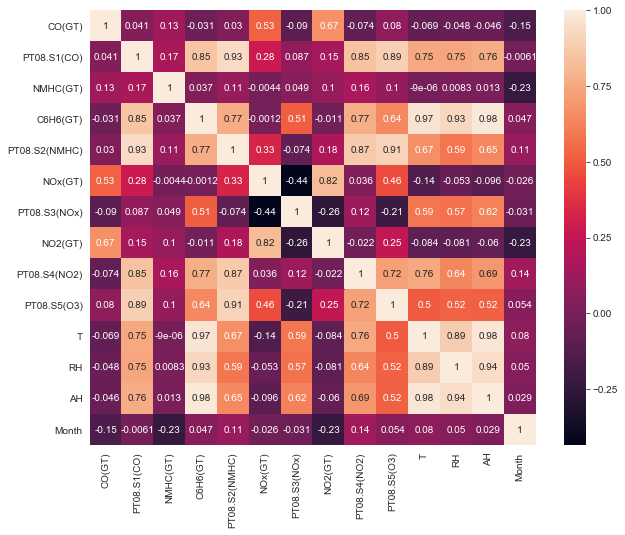

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# EDA

In [28]:
print("yearly relative humidity report")
df["RH"].resample("AS").mean()

yearly relative humidity report


Date
2004-01-01    40.292053
2005-01-01    36.932888
Freq: AS-JAN, Name: RH, dtype: float64

In [29]:
print("monthly relative humidity report")
df["RH"].resample("M").mean()

monthly relative humidity report


Date
2004-03-31    50.170784
2004-04-30    41.306944
2004-05-31    38.959543
2004-06-30    27.191944
2004-07-31    32.740995
2004-08-31    26.976478
2004-09-30    37.892083
2004-10-31    61.558871
2004-11-30    59.274861
2004-12-31    30.100134
2005-01-31    35.530645
2005-02-28    23.574107
2005-03-31    50.570699
2005-04-30    35.482759
Freq: M, Name: RH, dtype: float64

In [30]:
print("weekly relative humidity report")
df["RH"].resample("W").mean()

weekly relative humidity report


Date
2004-03-14    53.948039
2004-03-21    48.993452
2004-03-28    52.391667
2004-04-04    41.694643
2004-04-11    14.280952
2004-04-18    57.480952
2004-04-25    48.216667
2004-05-02    48.057143
2004-05-09    59.501786
2004-05-16    44.673214
2004-05-23    35.851786
2004-05-30    11.848214
2004-06-06    48.697024
2004-06-13    36.363690
2004-06-20    -7.963690
2004-06-27    30.004167
2004-07-04    35.697024
2004-07-11    31.258333
2004-07-18    31.955357
2004-07-25    34.772619
2004-08-01    32.889881
2004-08-08    48.319048
2004-08-15    38.672619
2004-08-22    37.755357
2004-08-29   -24.488095
2004-09-05    38.802381
2004-09-12    10.623214
2004-09-19    52.305357
2004-09-26    47.857738
2004-10-03    49.310119
2004-10-10    56.712500
2004-10-17    59.587500
2004-10-24    63.007143
2004-10-31    69.997619
2004-11-07    60.885119
2004-11-14    60.429167
2004-11-21    43.853571
2004-11-28    69.029762
2004-12-05    73.865476
2004-12-12    50.938690
2004-12-19   -57.433333
2004-12-26 

In [31]:
def plot_report(col1 , col2):
    
    plt.figure(figsize=(11,8))

    plt.subplot(2,2, 1)
    plt.plot(df[col1].resample("AS").mean(), label=col1)
    plt.plot(df[col2].resample("AS").mean(), label=col2)
    plt.title(col1 + " vs " + col2 + " (Yearly Report)")
    plt.legend()

    plt.subplot(2,2, 2)
    plt.plot(df[col1].resample("M").mean(), label=col1)
    plt.plot(df[col2].resample("M").mean(), label=col2)
    plt.title(col1 + " vs " + col2 + " (Monthly Report)")
    plt.legend()

    plt.subplot(2,2, 3)
    plt.plot(df[col1].resample("W").mean(), label=col1)
    plt.plot(df[col2].resample("W").mean(), label=col2)
    plt.title(col1 + " vs " + col2 + " (Weekly Report)")
    plt.legend()

    plt.tight_layout()

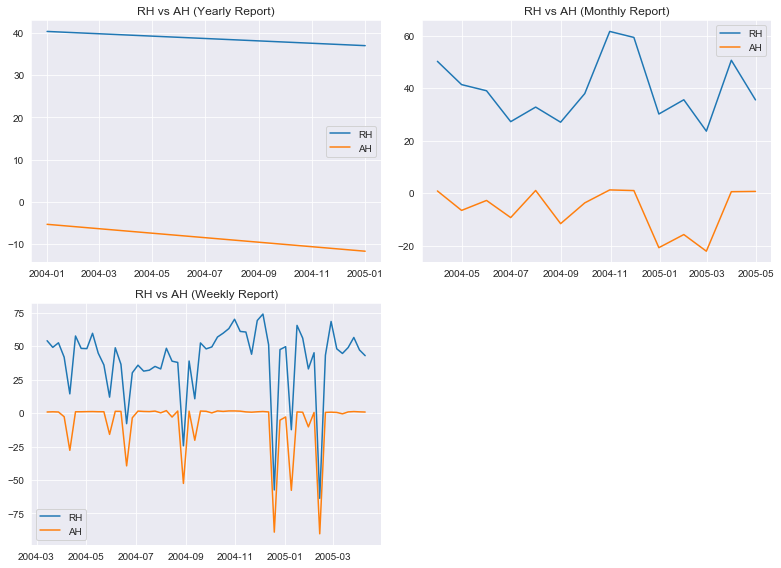

In [32]:
plot_report("RH", "AH")

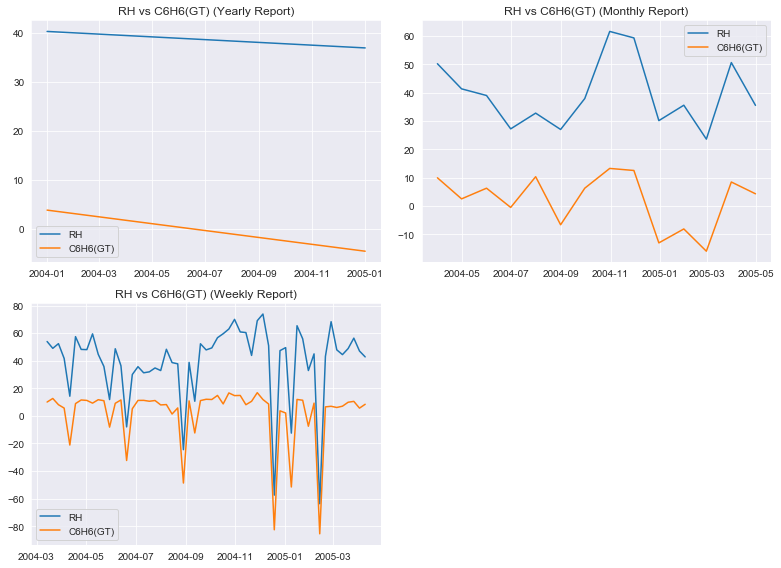

In [33]:
plot_report("RH", "C6H6(GT)")

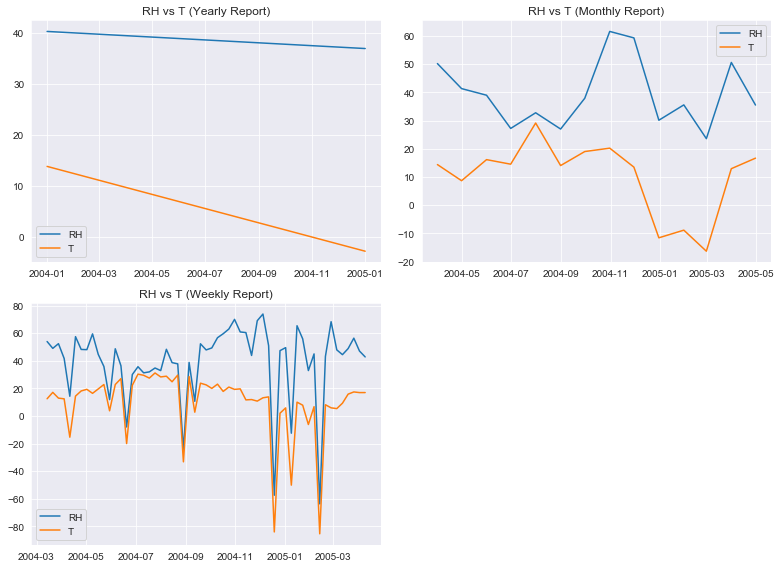

In [34]:
plot_report("RH", "T")

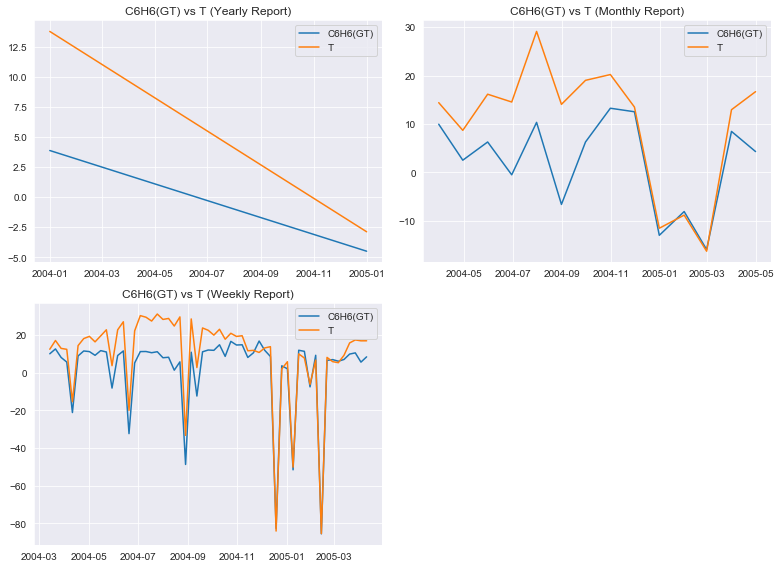

In [35]:
plot_report("C6H6(GT)", "T")

# Splitting Data

In [36]:
sc = StandardScaler()
X = df1.drop(["RH", "NMHC(GT)", "CO(GT)", "NO2(GT)", "NOx(GT)"], axis=1)
y = df1["RH"]

X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=101)

# Training Models

In [38]:
models = {
    "                   Linear Regression": LinearRegression(),
    "                                   SVM": SVR(),
    "                         Random Forest": RandomForestRegressor(),
}

In [39]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Linear Regression trained.
                                   SVM trained.
                         Random Forest trained.


# Evaluation

In [40]:
for name, model in models.items():
    print(name)
    print("--------------------"*3)
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("--------------------"*3)
    print('\n')    

                   Linear Regression
------------------------------------------------------------
Testing Accuracy: 0.88664
Training Accuracy: 0.88213
------------------------------------------------------------


                                   SVM
------------------------------------------------------------
Testing Accuracy: 0.96085
Training Accuracy: 0.96253
------------------------------------------------------------


                         Random Forest
------------------------------------------------------------
Testing Accuracy: 0.99815
Training Accuracy: 0.99952
------------------------------------------------------------




In [41]:
print("Cross Validation results:\n")
for name, model in models.items():
    print(name,"\n")
    print(cross_val_score(model, X_test, y_test, cv=5))
    print("-"*60)

Cross Validation results:

                   Linear Regression 

[0.89758444 0.88628299 0.88822719 0.88590298 0.8722971 ]
------------------------------------------------------------
                                   SVM 

[0.90586374 0.90281344 0.89513411 0.8835643  0.87757004]
------------------------------------------------------------
                         Random Forest 

[0.99242234 0.99380518 0.9931504  0.99316867 0.99405947]
------------------------------------------------------------


In [42]:
def eval(name, model):
    
    print(name)
    print("-"*40)
    predictions = model.predict(X_test)
    print(" MAE: ", np.round(mean_absolute_error(y_test, predictions), 5))
    print(" MSE: ", np.round(mean_squared_error(y_test, predictions), 5))
    print("RMSE: ", np.round(np.sqrt(mean_squared_error(y_test, predictions)), 5))
    print(" R^2: ", np.round(r2_score(y_test, predictions), 5))

In [43]:
for name, model in models.items():
    eval(name, model)

                   Linear Regression
----------------------------------------
 MAE:  4.64604
 MSE:  35.16971
RMSE:  5.93041
 R^2:  0.88664
                                   SVM
----------------------------------------
 MAE:  2.22465
 MSE:  12.14518
RMSE:  3.48499
 R^2:  0.96085
                         Random Forest
----------------------------------------
 MAE:  0.53198
 MSE:  0.57549
RMSE:  0.75861
 R^2:  0.99815
